# Ploting  Speed test results

In [1]:
import os
import re
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import custom_module as M

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# get master dict and convert to df
_dict = M.gather_dicts()
df = pd.DataFrame.from_dict(_dict)
df

,test1,test2,test3,test4,test5,test6,test7,test8,test9,test10,...,test28,test29,test30,test31,test32,test33,test34,test35,test36,test37
test,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,37
day,2020-06-07,2020-06-07,2020-06-07,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-10,2020-06-10,2020-06-10,...,2020-06-14,2020-06-15,2020-06-15,2020-06-16,2020-06-17,2020-06-17,2020-06-17,2020-06-17,2020-06-17,2020-06-23
location,living room,upper east,lower west,upper west,upper east,upper west,upper west,upper west,upper east,upper east,...,upper west,upper west,upper west,upper west,upper east,upper west,lower west,living room,upper west,lower west
computer,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 4530s,HP ProBook 4530s,HP ProBook 4530s,...,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 4530s,HP ProBook 450 G5,Inspiron 13-5378,HP ProBook 4530s,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5
router_location,living room west corner,living room west corner,living room west corner,living room west corner,living room west corner,living room west corner,living room west corner,living room west corner,living room west corner,living room west corner,...,hallway upstairs,hallway upstairs,hallway upstairs,hallway upstairs,hallway upstairs,hallway upstairs,hallway upstairs,hallway upstairs,hallway upstairs,hallway upstairs
data,"{'time': ['12:03:59', '12:07:13', '12:11:15', ...","{'time': ['12:46:26', '12:50:20', '12:52:20', ...","{'time': ['13:31:28', '13:35:30', '13:38:15', ...","{'time': ['14:09:46', '14:11:36', '14:16:51', ...","{'time': ['16:26:02', '16:28:46', '16:32:11', ...","{'time': ['18:19:50', '18:24:21', '18:28:50', ...","{'time': ['10:29:54', '10:32:24', '10:33:27', ...","{'time': ['11:06:16', '11:07:59', '11:11:08', ...","{'time': ['13:20:36', '13:25:25', '13:26:01', ...","{'time': ['16:29:26', '16:32:21', '16:34:55', ...",...,"{'time': ['12:20:42', '12:24:41', '12:28:20', ...","{'time': ['18:39:45', '18:42:19', '18:43:01', ...","{'time': ['20:14:42', '20:19:18', '20:21:39', ...","{'time': ['19:19:56', '19:21:49', '19:23:09', ...","{'time': ['11:00:50', '11:05:55', '11:08:29', ...","{'time': ['12:56:40', '12:58:19', '13:01:54', ...","{'time': ['13:37:57', '13:42:31', '13:44:23', ...","{'time': ['15:36:33', '15:40:04', '15:43:23', ...","{'time': ['18:17:20', '18:20:22', '18:24:40', ...","{'time': ['14:29:51', '14:31:49', '14:33:36', ..."


The data is a dict of times, download, and upload speeds in Mbps. I did not collect jitter or other metrics this time:

In [3]:
df['test1']['data']

{'time': ['12:03:59',
  '12:07:13',
  '12:11:15',
  '12:15:19',
  '12:19:53',
  '12:24:15',
  '12:25:55',
  '12:27:09',
  '12:29:03',
  '12:34:15'],
 'download': [99.75158,
  69.165935,
  82.09726,
  76.162253,
  49.996191,
  80.555113,
  132.313207,
  118.668693,
  97.323495,
  88.024754],
 'upload': [4.588742,
  5.515696,
  3.592372,
  6.51109,
  4.993106,
  5.375524,
  4.940173,
  5.650967,
  5.672564,
  6.971582]}

We can visualize this for a single test in all its glory - but this is too zoomed in for overall insights given how our speeds vary per day, time of day, router location, and computer used:

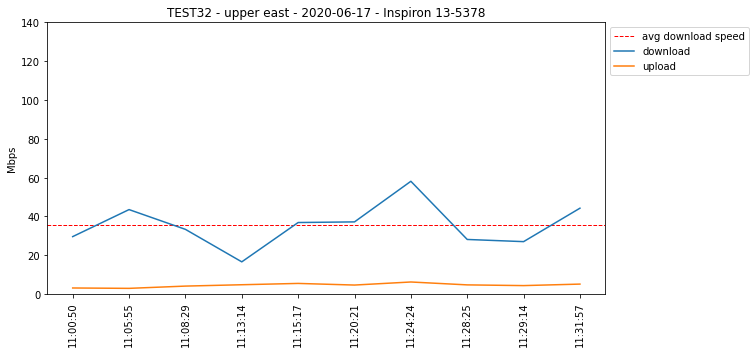

In [4]:
M.plot_single(df, 'test32');

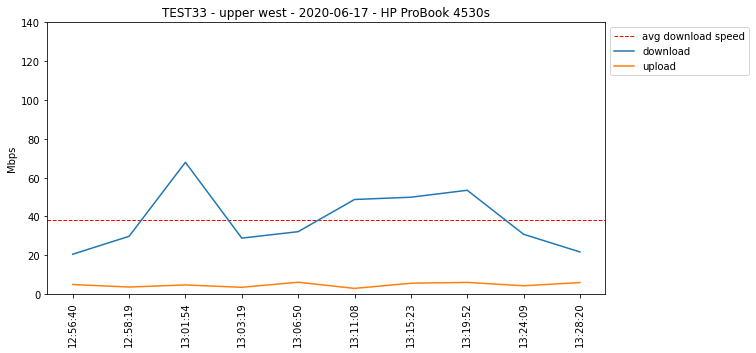

In [5]:
M.plot_single(df, 'test33');

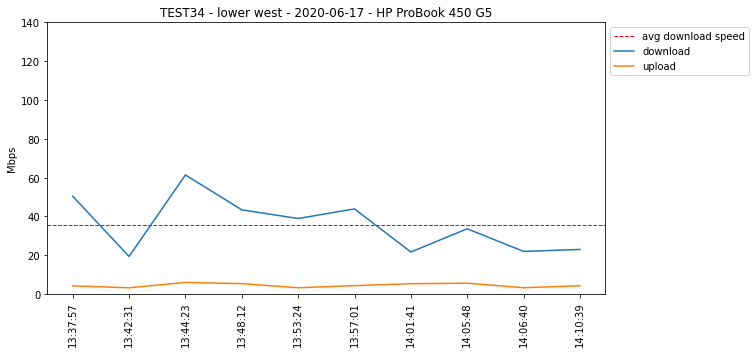

In [6]:
M.plot_single(df, 'test34');

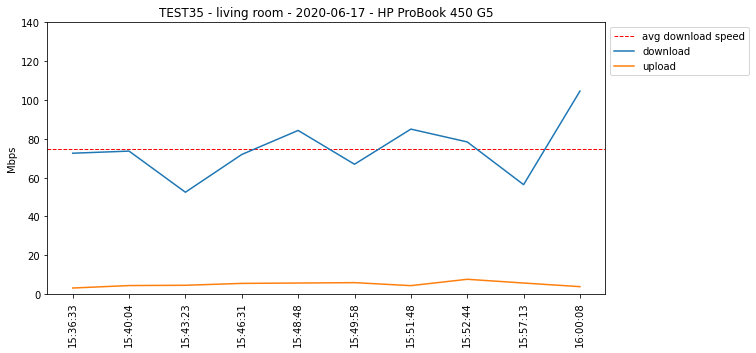

In [7]:
M.plot_single(df, 'test35');

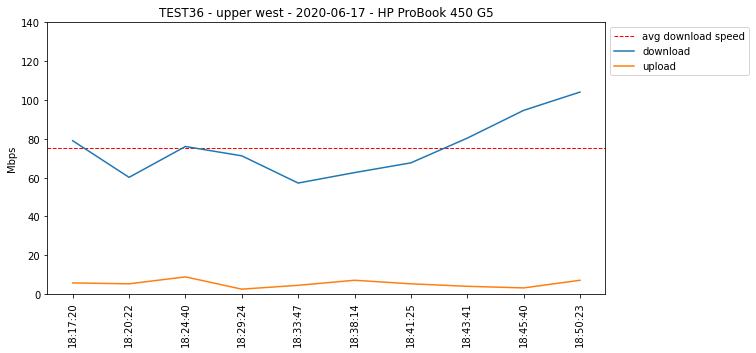

In [8]:
M.plot_single(df, 'test36');

## Dates

Focusing on download speeds since that's most of our use case at home, I look at variance in download times given different dates:

In [9]:
date_df = M.transform_data(df, "day")
date_df.iloc[:,:10]

,2020-06-07,2020-06-07,2020-06-07,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-10,2020-06-10,2020-06-10
0,99.751580,41.039935,93.493913,66.902935,32.044196,66.419107,122.409275,24.492825,31.211880,32.814672
1,69.165935,47.908396,67.554907,109.046060,14.903680,61.665326,107.105495,29.259755,32.348858,18.641280
2,82.097260,41.205536,77.519773,75.464375,41.233320,37.660307,34.099353,46.525715,39.120474,14.031744
3,76.162253,49.155870,104.369230,80.596316,22.511722,55.285879,65.111738,37.090685,21.847185,15.798649
4,49.996191,70.795400,59.548327,56.638547,24.779011,11.976199,119.922186,66.819126,49.677905,40.156984
5,80.555113,25.725200,125.089836,85.813226,27.821760,12.257830,61.931694,32.642292,36.459608,48.074930
6,132.313207,50.335698,57.063406,107.269454,15.754265,44.757760,48.782933,70.483728,45.251242,23.157007
7,118.668693,33.906345,102.293335,92.528915,39.562590,54.784480,66.499452,43.154635,48.388661,49.213574
8,97.323495,61.458700,33.933635,89.636640,42.674279,20.726856,63.223840,75.289383,32.906248,55.514818
9,88.024754,48.716588,105.148166,121.669805,44.402936,30.362494,104.535887,24.037394,56.697534,35.752466


Since it's hard to get a sense by looking at numbers, we can plot a __heatmap__:

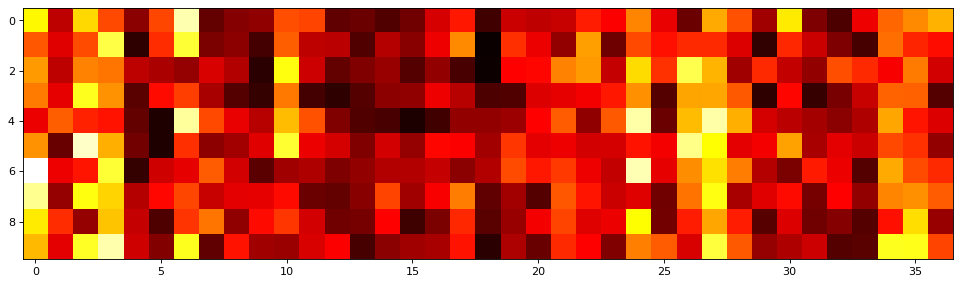

In [10]:
fig=plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(date_df, cmap='hot', interpolation='nearest')
plt.show()

There's a lot of variation but we can see how some tests result in lower speeds and others in higher speeds by looking at the vertical bands. The first few tests had unusually high speeds but eventually we get streaks of low speeds. 

Another way to visualize this would be __boxplots__ to show the variation `within` and `in-between` tests:

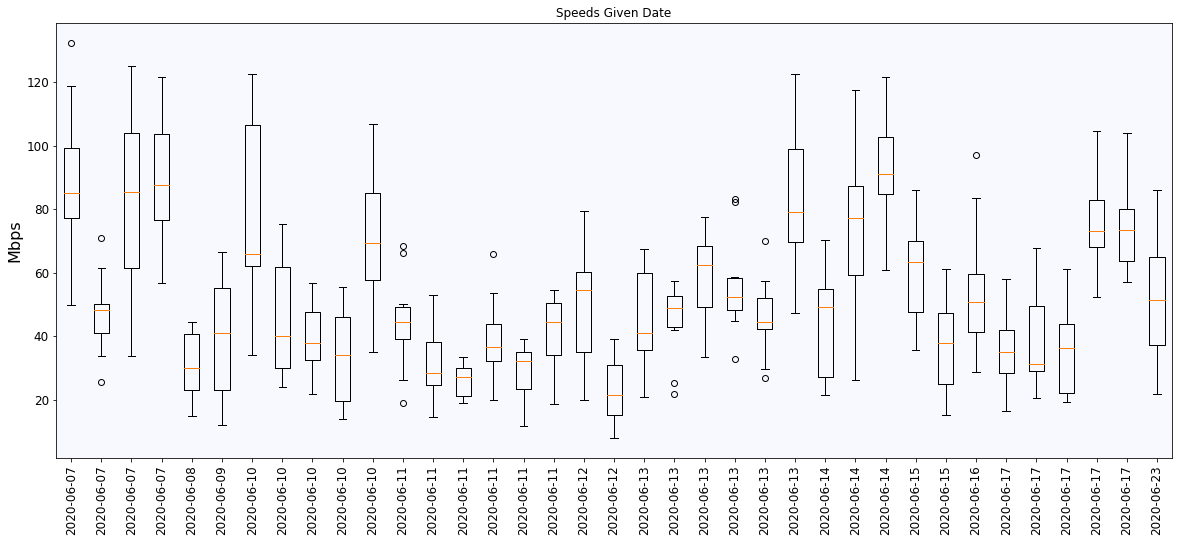

In [11]:
M.plot_results(date_df, "Date")

## Router location

Router locations might play a big role in speed variation - unfortunately I did not collect enough samples for a robust evaluation across samples but here we can see how much variance exists just by a few quick plots:

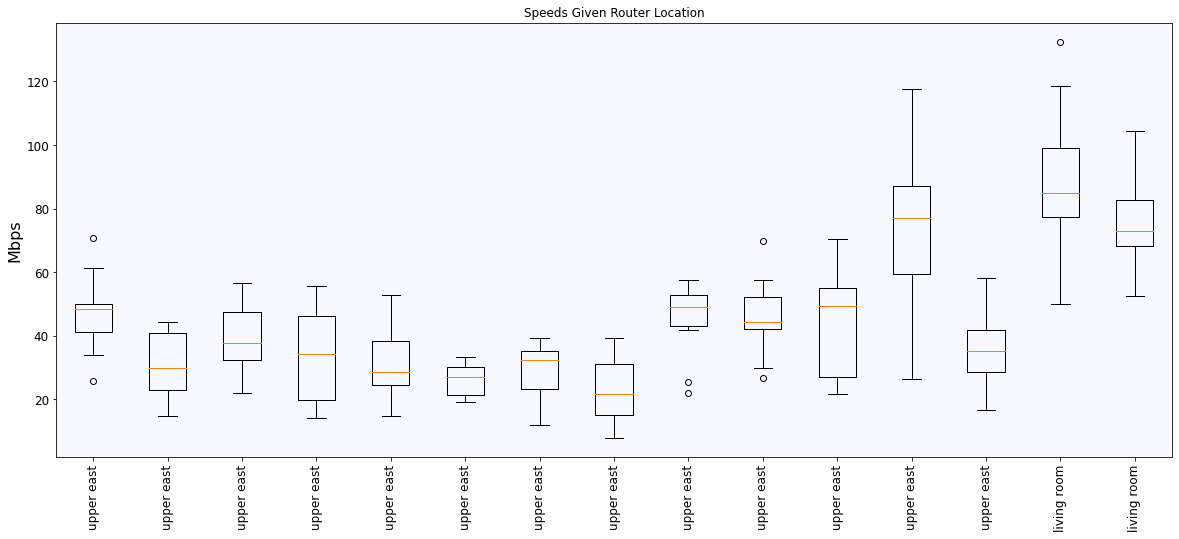

In [12]:
loc_df = M.transform_data(df, 'location')
M.plot_results(loc_df[['upper east', 'living room']], 
               "Router Location")

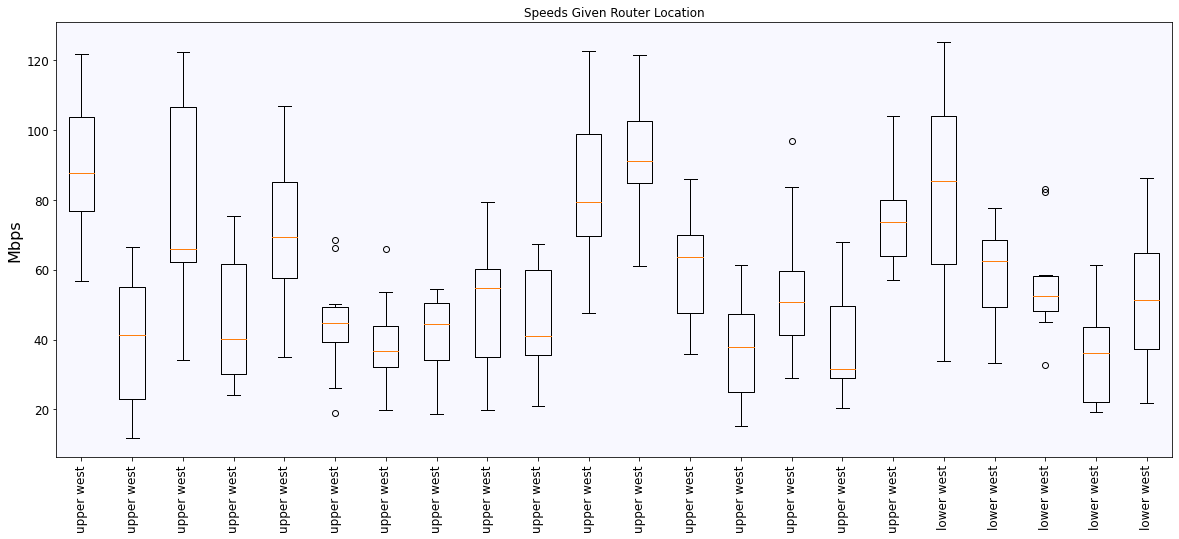

In [13]:
M.plot_results(loc_df[['upper west', 'lower west']], 
               "Router Location")

I'm not entirely sure what to make of this, except that router location might not make as huge an impact as I once thought, and the variation is higher than I hoped for.

## Computer

Old vs new laptops introduce yet another source of variation - this time the signal is clearer:

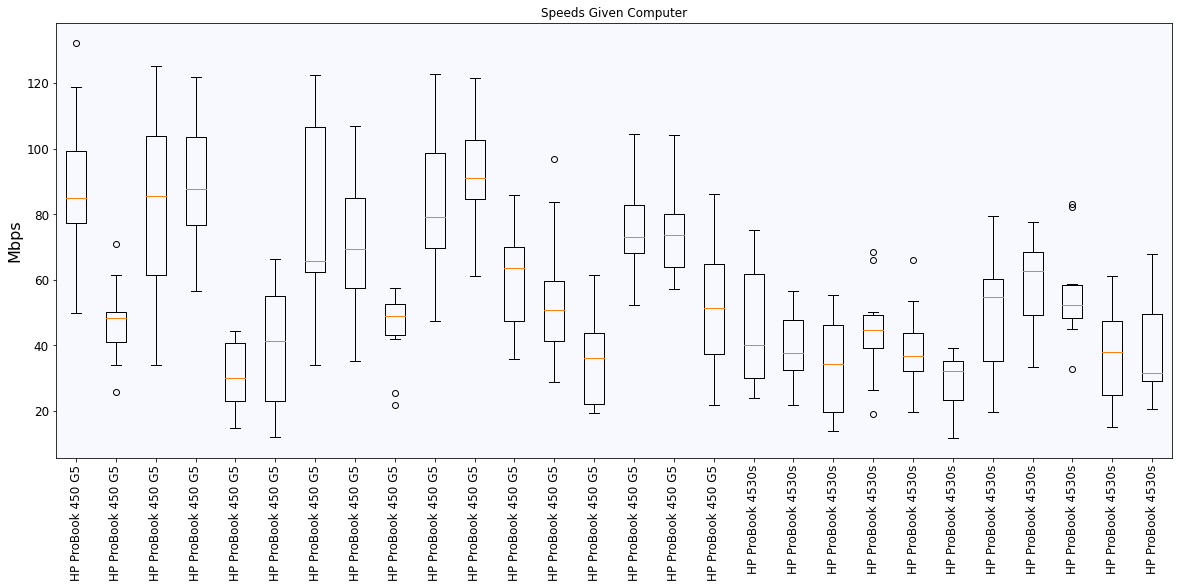

In [14]:
# HP laptops
comp_df = M.transform_data(df, "computer")
M.plot_results(comp_df[['HP ProBook 450 G5', 'HP ProBook 4530s']],
               "Computer")

The newer HP ProBook gets greater speeds but also has its bad moments and greater variance than I'd have hoped for.

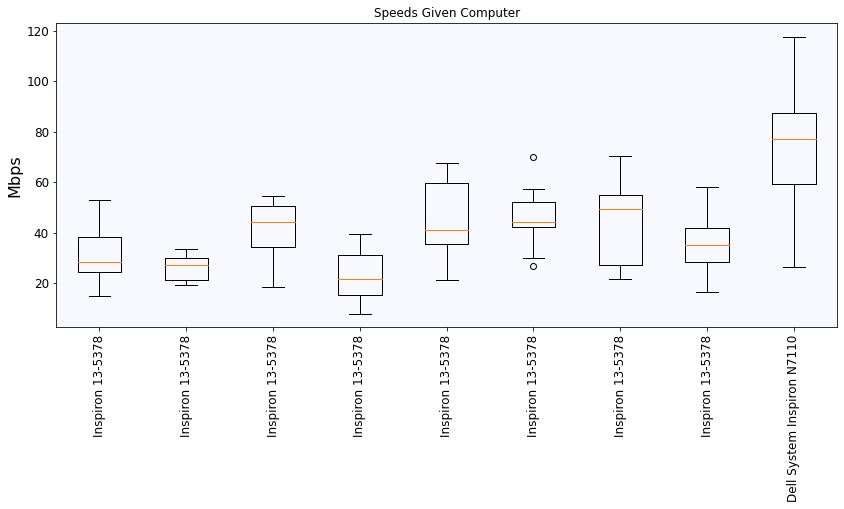

In [15]:
# Dell laptops
M.plot_results(comp_df[['Inspiron 13-5378', 'Dell System Inspiron N7110']], 
               "Computer", scale=.7)

*Statistics* vs *common sense*:
- I was mostly concerned about speeds for the old Dell so I did not test the new Dell more than once, which is statistically unsound but makes sense, I did not need more than one test to confirm what I knew and was experiencing. I also had less access to these computers.

---